# Nguyễn Ngọc Đạt - 11200745 

In [82]:
import pandas as pd
import numpy as np
from numpy import arange
import torch
import torch.nn as nn
import torch.optim as optim
from matplotlib import pyplot
from numpy import asarray
from numpy.random import rand
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Bài 1:

### Cho phương trình f(x)= x^2, hãy sử dụng thuật toán gradient descent để tối ưu. Sau đó vẽ đồ thị hàm f(x) sau 10 lần cập nhật bước 2 với:
### * Lr = 0.2
### * Lr = 2


### Gradient descent function

In [83]:
# objective function
def objective(x):
    return x**2.0

In [84]:
# define range for input
r_min, r_max = -1.0, 1.0
# sample input range uniformly at 0.1 increments
inputs = arange(r_min, r_max+0.1, 0.1)
# compute targets
results = objective(inputs)

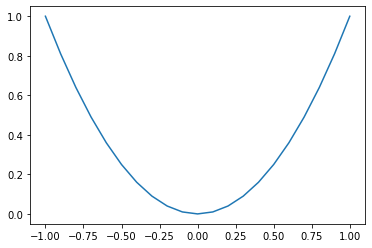

In [85]:
# create a line plot of input vs result
pyplot.plot(inputs, results)
# show the plot
pyplot.show()

In [86]:
# derivative of objective function
def derivative(x):
    return x * 2.0

In [87]:
bounds = asarray([[-1.0, 1.0]])
bounds[:,1]
rand(len(bounds)) 

array([0.12913668])

### Lr = 0.2

>0 f([0.11980163]) = 0.01435
>1 f([0.07188098]) = 0.00517
>2 f([0.04312859]) = 0.00186
>3 f([0.02587715]) = 0.00067
>4 f([0.01552629]) = 0.00024
>5 f([0.00931577]) = 0.00009
>6 f([0.00558946]) = 0.00003
>7 f([0.00335368]) = 0.00001
>8 f([0.00201221]) = 0.00000
>9 f([0.00120732]) = 0.00000
>10 f([0.00072439]) = 0.00000
>11 f([0.00043464]) = 0.00000
>12 f([0.00026078]) = 0.00000
>13 f([0.00015647]) = 0.00000
>14 f([9.38815459e-05]) = 0.00000
>15 f([5.63289276e-05]) = 0.00000
>16 f([3.37973565e-05]) = 0.00000
>17 f([2.02784139e-05]) = 0.00000
>18 f([1.21670484e-05]) = 0.00000
>19 f([7.30022901e-06]) = 0.00000
>20 f([4.38013741e-06]) = 0.00000
>21 f([2.62808244e-06]) = 0.00000
>22 f([1.57684947e-06]) = 0.00000
>23 f([9.4610968e-07]) = 0.00000
>24 f([5.67665808e-07]) = 0.00000
>25 f([3.40599485e-07]) = 0.00000
>26 f([2.04359691e-07]) = 0.00000
>27 f([1.22615815e-07]) = 0.00000
>28 f([7.35694887e-08]) = 0.00000
>29 f([4.41416932e-08]) = 0.00000


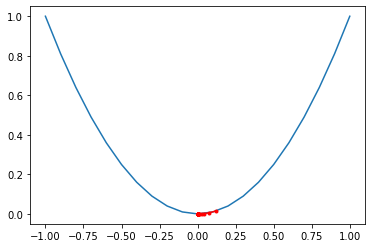

In [88]:
# gradient descent algorithm
def gradient_descent(objective, derivative, bounds, n_iter, step_size):
    # track all solutions
    solutions, scores = list(), list()
    # generate an initial point
    #solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    solution = rand(len(bounds))
    for i in range(n_iter):
        # calculate gradient
        gradient = derivative(solution)
        # take a step
        solution = solution - step_size * gradient
        # evaluate candidate point
        solution_eval = objective(solution)
        # store solution
        solutions.append(solution)
        scores.append(solution_eval)
        # report progress
        print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
    return [solutions, scores]

# define range for input
bounds = asarray([[-1.0, 1.0]])
# define the total iterations
n_iter = 30
# define the step size
step_size = 0.2
# perform the gradient descent search
solutions, scores = gradient_descent(objective, derivative, bounds, n_iter, step_size)
# sample input range uniformly at 0.1 increments
inputs = arange(bounds[0,0], bounds[0,1]+0.1, 0.1)
# compute targets
results = objective(inputs)
# create a line plot of input vs result
pyplot.plot(inputs, results)
# plot the solutions found
pyplot.plot(solutions, scores, '.-', color='red')
# show the plot
pyplot.show()

### Lr = 2 

>0 f([-0.66413171]) = 0.44107
>1 f([1.99239512]) = 3.96964
>2 f([-5.97718537]) = 35.72674
>3 f([17.93155612]) = 321.54070
>4 f([-53.79466837]) = 2893.86634
>5 f([161.38400511]) = 26044.79710
>6 f([-484.15201532]) = 234403.17393
>7 f([1452.45604595]) = 2109628.56541
>8 f([-4357.36813784]) = 18986657.08866
>9 f([13072.10441352]) = 170879913.79790
>10 f([-39216.31324055]) = 1537919224.18110
>11 f([117648.93972166]) = 13841273017.62994
>12 f([-352946.81916497]) = 124571457158.66943
>13 f([1058840.45749491]) = 1121143114428.02515
>14 f([-3176521.37248472]) = 10090288029852.22656
>15 f([9529564.11745417]) = 90812592268670.03125
>16 f([-28588692.3523625]) = 817313330418030.25000
>17 f([85766077.05708751]) = 7355819973762273.00000
>18 f([-2.57298231e+08]) = 66202379763860456.00000
>19 f([7.71894694e+08]) = 595821417874744192.00000
>20 f([-2.31568408e+09]) = 5362392760872696832.00000
>21 f([6.94705224e+09]) = 48261534847854272512.00000
>22 f([-2.08411567e+10]) = 434353813630688428032.00000
>23 

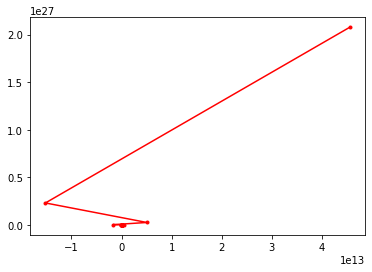

In [89]:
solutions, scores = gradient_descent(objective, derivative, bounds, n_iter, 2)
# sample input range uniformly at 0.1 increments
inputs = arange(bounds[0,0], bounds[0,1]+0.1, 0.1)
# compute targets
results = objective(inputs)
# create a line plot of input vs result
pyplot.plot(inputs, results)
# plot the solutions found
pyplot.plot(solutions, scores, '.-', color='red')
# show the plot
pyplot.show()

### Bài 2: 
### Cho dataset dự đoán giá nhà dựa vào diện tích (https://github.com/nttuan8/DL_Tutorial/blob/master/L1/data_linear.csv) Dựa vào code mẫu hãy
### * Implement thuật toán linear regression với dữ liệu trên
### * Chỉnh learning rate cho dữ liệu trên, chọn 1 learning rate lớn bị overshoot, 1 learning vừa, và 1 learning rate nhỏ. Với mỗi learning rate, vẽ đồ thị loss tương ứng
### * Chia tập train/test tỉ lệ 80/20, tính các chỉ số MSE, RSME, MAE, MAPE trên tập test


In [90]:
df = pd.read_csv('data_linear.csv')

In [91]:
df.head()

,Diện tích,Giá
0,30.0000,448.524
1,32.4138,509.248
2,34.8276,535.104
3,37.2414,551.432
4,39.6552,623.418


In [92]:
df.shape

(30, 2)

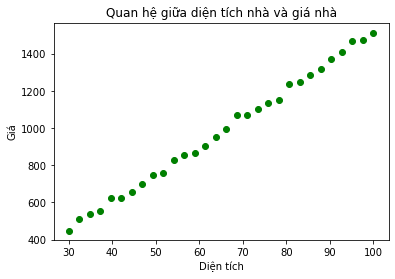

In [93]:
x = np.array(df['Diện tích'])
Y = np.array(df['Giá'])
plt.plot(x, Y,'go')
plt.xlabel('Diện tích')
plt.ylabel('Giá')
plt.title('Quan hệ giữa diện tích nhà và giá nhà')
plt.show()

### Implement thuật toán với bài toán/dữ liệu trên 

In [94]:
class LinearRegression(torch.nn.Module): 
    def __init__(self):
        super(LinearRegression, self).__init__() 
        self.linear = torch.nn.Linear(1, 1, bias = True) # bias is default True

    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [95]:
our_model = LinearRegression()
criterion = torch.nn.MSELoss()

In [96]:
def trainBuildIn(model, x, y, _iter, lr):
    loss_list = []
    criterion = torch.nn.MSELoss()
    optimizer = torch.optim.SGD(our_model.parameters(), lr = lr) 
    
    for i in range(_iter):
        # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
        optimizer.zero_grad()
        
        # get output from the model, given the inputs
        y_pred = model(x)

        # get loss for the predicted output
        loss = criterion(y_pred, y)
        print(loss)
        loss_list.append(loss.item())
        # get gradients w.r.t to parameters
        loss.backward()

        # update parameters
        optimizer.step()

        print('Iter {}, loss {}'.format(i, loss.item()))
        
    return loss_list

In [97]:
x = np.array(df['Diện tích']).reshape([30,1]).astype(np.float32)
Y = np.array(df['Giá']).reshape([30,1]).astype(np.float32)

x = torch.from_numpy(x)
Y = torch.from_numpy(Y)

### Chỉnh learning rate cho dữ liệu trên, chọn 1 learning rate lớn bị overshoot, 1 learning vừa, và 1 learning rate nhỏ. Với mỗi learning rate, vẽ đồ thị loss tương ứng

### Learning rate vừa

In [98]:
loss_list_1 = trainBuildIn(our_model, x, Y, 200, 0.00001)

tensor(1022534.2500, grad_fn=<MseLossBackward0>)
Iter 0, loss 1022534.25
tensor(840771.7500, grad_fn=<MseLossBackward0>)
Iter 1, loss 840771.75
tensor(691326.8125, grad_fn=<MseLossBackward0>)
Iter 2, loss 691326.8125
tensor(568453.1875, grad_fn=<MseLossBackward0>)
Iter 3, loss 568453.1875
tensor(467426.7188, grad_fn=<MseLossBackward0>)
Iter 4, loss 467426.71875
tensor(384362.8750, grad_fn=<MseLossBackward0>)
Iter 5, loss 384362.875
tensor(316067.7812, grad_fn=<MseLossBackward0>)
Iter 6, loss 316067.78125
tensor(259915.6406, grad_fn=<MseLossBackward0>)
Iter 7, loss 259915.640625
tensor(213747.3594, grad_fn=<MseLossBackward0>)
Iter 8, loss 213747.359375
tensor(175787.8906, grad_fn=<MseLossBackward0>)
Iter 9, loss 175787.890625
tensor(144577.5781, grad_fn=<MseLossBackward0>)
Iter 10, loss 144577.578125
tensor(118916.5391, grad_fn=<MseLossBackward0>)
Iter 11, loss 118916.5390625
tensor(97818.0703, grad_fn=<MseLossBackward0>)
Iter 12, loss 97818.0703125
tensor(80470.8750, grad_fn=<MseLossBa

In [99]:
y_pred_bi = our_model(x).data.numpy()

print("----- ----- ----- ----- -----")
print("Prediction:")
for name, param in our_model.named_parameters():
    if param.requires_grad:
        print(name, param.data)

----- ----- ----- ----- -----
Prediction:
linear.weight tensor([[15.0973]])
linear.bias tensor([1.0934])


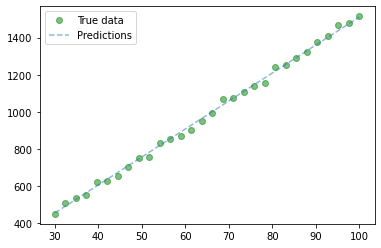

In [100]:
plt.clf()
plt.plot(df['Diện tích'], df['Giá'], 'go', label='True data', alpha=0.5)
plt.plot(df['Diện tích'], y_pred_bi, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

### Đồ thị hàm loss với epochs = 200, lr = 0.00001

In [101]:
#loss_list_1

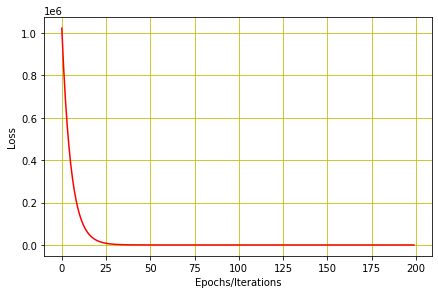

In [102]:
plt.plot(loss_list_1, 'r')
plt.tight_layout()
plt.grid('True', color='y')
plt.xlabel("Epochs/Iterations")
plt.ylabel("Loss")
plt.show()

### Learning rate lớn

In [103]:
our_model_2 = LinearRegression()

In [104]:
loss_list_2 = trainBuildIn(our_model_2, x, Y, 200, 0.75)

tensor(970558.6875, grad_fn=<MseLossBackward0>)
Iter 0, loss 970558.6875
tensor(970558.6875, grad_fn=<MseLossBackward0>)
Iter 1, loss 970558.6875
tensor(970558.6875, grad_fn=<MseLossBackward0>)
Iter 2, loss 970558.6875
tensor(970558.6875, grad_fn=<MseLossBackward0>)
Iter 3, loss 970558.6875
tensor(970558.6875, grad_fn=<MseLossBackward0>)
Iter 4, loss 970558.6875
tensor(970558.6875, grad_fn=<MseLossBackward0>)
Iter 5, loss 970558.6875
tensor(970558.6875, grad_fn=<MseLossBackward0>)
Iter 6, loss 970558.6875
tensor(970558.6875, grad_fn=<MseLossBackward0>)
Iter 7, loss 970558.6875
tensor(970558.6875, grad_fn=<MseLossBackward0>)
Iter 8, loss 970558.6875
tensor(970558.6875, grad_fn=<MseLossBackward0>)
Iter 9, loss 970558.6875
tensor(970558.6875, grad_fn=<MseLossBackward0>)
Iter 10, loss 970558.6875
tensor(970558.6875, grad_fn=<MseLossBackward0>)
Iter 11, loss 970558.6875
tensor(970558.6875, grad_fn=<MseLossBackward0>)
Iter 12, loss 970558.6875
tensor(970558.6875, grad_fn=<MseLossBackward0>)


In [105]:
y_pred_bi = our_model_2(x).data.numpy()

print("----- ----- ----- ----- -----")
print("Prediction:")
for name, param in our_model_2.named_parameters():
    if param.requires_grad:
        print(name, param.data)

----- ----- ----- ----- -----
Prediction:
linear.weight tensor([[0.6861]])
linear.bias tensor([-0.0774])


### Đồ thị hàm loss với epochs = 200, lr = 0.75

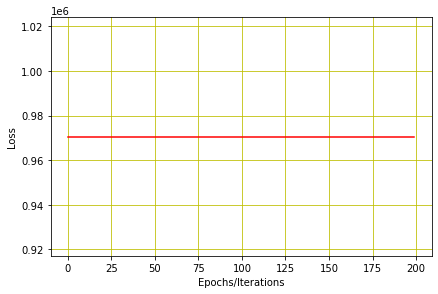

In [106]:
plt.plot(loss_list_2, 'r')
plt.tight_layout()
plt.grid('True', color='y')
plt.xlabel("Epochs/Iterations")
plt.ylabel("Loss")
plt.show()

### Learning rate nhỏ 

In [107]:
our_model_3 = LinearRegression()

In [108]:
loss_list_3 = trainBuildIn(our_model_3, x, Y, 200, 0.00000000000001)

tensor(1057443.1250, grad_fn=<MseLossBackward0>)
Iter 0, loss 1057443.125
tensor(1057443.1250, grad_fn=<MseLossBackward0>)
Iter 1, loss 1057443.125
tensor(1057443.1250, grad_fn=<MseLossBackward0>)
Iter 2, loss 1057443.125
tensor(1057443.1250, grad_fn=<MseLossBackward0>)
Iter 3, loss 1057443.125
tensor(1057443.1250, grad_fn=<MseLossBackward0>)
Iter 4, loss 1057443.125
tensor(1057443.1250, grad_fn=<MseLossBackward0>)
Iter 5, loss 1057443.125
tensor(1057443.1250, grad_fn=<MseLossBackward0>)
Iter 6, loss 1057443.125
tensor(1057443.1250, grad_fn=<MseLossBackward0>)
Iter 7, loss 1057443.125
tensor(1057443.1250, grad_fn=<MseLossBackward0>)
Iter 8, loss 1057443.125
tensor(1057443.1250, grad_fn=<MseLossBackward0>)
Iter 9, loss 1057443.125
tensor(1057443.1250, grad_fn=<MseLossBackward0>)
Iter 10, loss 1057443.125
tensor(1057443.1250, grad_fn=<MseLossBackward0>)
Iter 11, loss 1057443.125
tensor(1057443.1250, grad_fn=<MseLossBackward0>)
Iter 12, loss 1057443.125
tensor(1057443.1250, grad_fn=<MseLo

tensor(1057443.1250, grad_fn=<MseLossBackward0>)
Iter 169, loss 1057443.125
tensor(1057443.1250, grad_fn=<MseLossBackward0>)
Iter 170, loss 1057443.125
tensor(1057443.1250, grad_fn=<MseLossBackward0>)
Iter 171, loss 1057443.125
tensor(1057443.1250, grad_fn=<MseLossBackward0>)
Iter 172, loss 1057443.125
tensor(1057443.1250, grad_fn=<MseLossBackward0>)
Iter 173, loss 1057443.125
tensor(1057443.1250, grad_fn=<MseLossBackward0>)
Iter 174, loss 1057443.125
tensor(1057443.1250, grad_fn=<MseLossBackward0>)
Iter 175, loss 1057443.125
tensor(1057443.1250, grad_fn=<MseLossBackward0>)
Iter 176, loss 1057443.125
tensor(1057443.1250, grad_fn=<MseLossBackward0>)
Iter 177, loss 1057443.125
tensor(1057443.1250, grad_fn=<MseLossBackward0>)
Iter 178, loss 1057443.125
tensor(1057443.1250, grad_fn=<MseLossBackward0>)
Iter 179, loss 1057443.125
tensor(1057443.1250, grad_fn=<MseLossBackward0>)
Iter 180, loss 1057443.125
tensor(1057443.1250, grad_fn=<MseLossBackward0>)
Iter 181, loss 1057443.125
tensor(10574

In [109]:
y_pred_bi = our_model_3(x).data.numpy()

print("----- ----- ----- ----- -----")
print("Prediction:")
for name, param in our_model_3.named_parameters():
    if param.requires_grad:
        print(name, param.data)

----- ----- ----- ----- -----
Prediction:
linear.weight tensor([[0.0465]])
linear.bias tensor([0.4652])


### Đồ thị hàm loss với epochs = 200, lr = 0.00000000000001

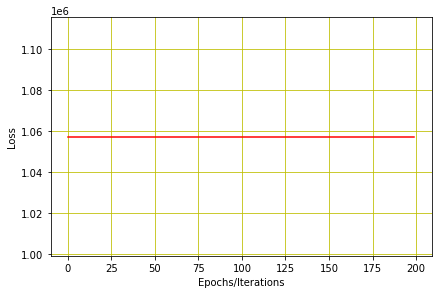

In [110]:
plt.plot(loss_list_3, 'r')
plt.tight_layout()
plt.grid('True', color='y')
plt.xlabel("Epochs/Iterations")
plt.ylabel("Loss")
plt.show()

### Chia tập train/test tỉ lệ 80/20, tính các chỉ số MSE, RSME, MAE, MAPE trên tập test

In [111]:
X_train, X_test, y_train, y_test = train_test_split(
...     x, Y, test_size=0.2, random_state=42)

In [112]:
X_train

tensor([[ 97.5862],
        [ 87.9310],
        [ 58.9655],
        [ 30.0000],
        [ 39.6552],
        [ 68.6207],
        [ 42.0690],
        [ 61.3793],
        [ 56.5517],
        [ 83.1034],
        [ 32.4138],
        [ 34.8276],
        [ 90.3448],
        [ 37.2414],
        [ 80.6897],
        [ 92.7586],
        [ 73.4483],
        [100.0000],
        [ 78.2759],
        [ 46.8966],
        [ 54.1379],
        [ 63.7931],
        [ 75.8621],
        [ 44.4828]])

In [113]:
our_model_4 = LinearRegression()

In [114]:
fn_loss_lst = trainBuildIn(our_model_4, X_train, y_train, 400, 0.00001)

tensor(960640.3125, grad_fn=<MseLossBackward0>)
Iter 0, loss 960640.3125
tensor(960640.3125, grad_fn=<MseLossBackward0>)
Iter 1, loss 960640.3125
tensor(960640.3125, grad_fn=<MseLossBackward0>)
Iter 2, loss 960640.3125
tensor(960640.3125, grad_fn=<MseLossBackward0>)
Iter 3, loss 960640.3125
tensor(960640.3125, grad_fn=<MseLossBackward0>)
Iter 4, loss 960640.3125
tensor(960640.3125, grad_fn=<MseLossBackward0>)
Iter 5, loss 960640.3125
tensor(960640.3125, grad_fn=<MseLossBackward0>)
Iter 6, loss 960640.3125
tensor(960640.3125, grad_fn=<MseLossBackward0>)
Iter 7, loss 960640.3125
tensor(960640.3125, grad_fn=<MseLossBackward0>)
Iter 8, loss 960640.3125
tensor(960640.3125, grad_fn=<MseLossBackward0>)
Iter 9, loss 960640.3125
tensor(960640.3125, grad_fn=<MseLossBackward0>)
Iter 10, loss 960640.3125
tensor(960640.3125, grad_fn=<MseLossBackward0>)
Iter 11, loss 960640.3125
tensor(960640.3125, grad_fn=<MseLossBackward0>)
Iter 12, loss 960640.3125
tensor(960640.3125, grad_fn=<MseLossBackward0>)


tensor(960640.3125, grad_fn=<MseLossBackward0>)
Iter 149, loss 960640.3125
tensor(960640.3125, grad_fn=<MseLossBackward0>)
Iter 150, loss 960640.3125
tensor(960640.3125, grad_fn=<MseLossBackward0>)
Iter 151, loss 960640.3125
tensor(960640.3125, grad_fn=<MseLossBackward0>)
Iter 152, loss 960640.3125
tensor(960640.3125, grad_fn=<MseLossBackward0>)
Iter 153, loss 960640.3125
tensor(960640.3125, grad_fn=<MseLossBackward0>)
Iter 154, loss 960640.3125
tensor(960640.3125, grad_fn=<MseLossBackward0>)
Iter 155, loss 960640.3125
tensor(960640.3125, grad_fn=<MseLossBackward0>)
Iter 156, loss 960640.3125
tensor(960640.3125, grad_fn=<MseLossBackward0>)
Iter 157, loss 960640.3125
tensor(960640.3125, grad_fn=<MseLossBackward0>)
Iter 158, loss 960640.3125
tensor(960640.3125, grad_fn=<MseLossBackward0>)
Iter 159, loss 960640.3125
tensor(960640.3125, grad_fn=<MseLossBackward0>)
Iter 160, loss 960640.3125
tensor(960640.3125, grad_fn=<MseLossBackward0>)
Iter 161, loss 960640.3125
tensor(960640.3125, grad_

tensor(960640.3125, grad_fn=<MseLossBackward0>)
Iter 321, loss 960640.3125
tensor(960640.3125, grad_fn=<MseLossBackward0>)
Iter 322, loss 960640.3125
tensor(960640.3125, grad_fn=<MseLossBackward0>)
Iter 323, loss 960640.3125
tensor(960640.3125, grad_fn=<MseLossBackward0>)
Iter 324, loss 960640.3125
tensor(960640.3125, grad_fn=<MseLossBackward0>)
Iter 325, loss 960640.3125
tensor(960640.3125, grad_fn=<MseLossBackward0>)
Iter 326, loss 960640.3125
tensor(960640.3125, grad_fn=<MseLossBackward0>)
Iter 327, loss 960640.3125
tensor(960640.3125, grad_fn=<MseLossBackward0>)
Iter 328, loss 960640.3125
tensor(960640.3125, grad_fn=<MseLossBackward0>)
Iter 329, loss 960640.3125
tensor(960640.3125, grad_fn=<MseLossBackward0>)
Iter 330, loss 960640.3125
tensor(960640.3125, grad_fn=<MseLossBackward0>)
Iter 331, loss 960640.3125
tensor(960640.3125, grad_fn=<MseLossBackward0>)
Iter 332, loss 960640.3125
tensor(960640.3125, grad_fn=<MseLossBackward0>)
Iter 333, loss 960640.3125
tensor(960640.3125, grad_

In [115]:
y_pred_bi_fn = our_model(y_test).data.numpy()

print("----- ----- ----- ----- -----")
print("Prediction:")
for name, param in our_model.named_parameters():
    if param.requires_grad:
        print(name, param.data)

----- ----- ----- ----- -----
Prediction:
linear.weight tensor([[15.0973]])
linear.bias tensor([1.0934])


In [116]:
y_pred_bi_fn = torch.from_numpy(y_pred_bi_fn)

In [117]:
mse = criterion(y_pred_bi_fn, y_test)
rmse = torch.sqrt(mse)
mae = torch.mean(torch.abs(y_pred_bi_fn - y_test))
mape = torch.mean(torch.abs((y_pred_bi_fn - y_test) / y_test)) * 100.0

In [118]:
print(mse, rmse, mae, mape)

tensor(2.3519e+08) tensor(15335.8438) tensor(14884.1436) tensor(1409.8435)
